### **Welcome Again !!**

**Now we'll Break down each step of the Scikit-learn Workflow !!**


In [2]:
# Let's again clarify the contents

what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [3]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## To plot the figure automatically in Notebook.
%matplotlib inline
# print(plt.style.available) // To see available styles.
plt.style.use("seaborn-v0_8-dark-palette")
plt.style.use('dark_background')

# **1. Getting Our Data Ready to be used with ML Model !**

- **Data Preprocessing :** It includes various subtasks to get data ready for further processing (Analysis for insights | Training ML Model etc.)

  - **Data Cleaning :** Handling Missing values, outliers and anomalies. Ensuring the Data is as clean and accurate as possible.

  - **Data Transformation :** This involves converting the data into a suitable format for machine learning. It might include encoding categorical variables **(Feature Encoding)**, scaling numeric features, or normalizing the data.

  - **Feature Engineering :** Here, we create new features or modify/combine existing ones, to improve the Performance of ML Models.

- **Data Splitting :** Splitting the Data generally into **Training & Testing Sets**. | For accurate training & evaluation.

##### _Now, Let's view our Data._


In [4]:
# Importing the Data form CSV.

# I know the Data is cleaned, but still let's follow the Workflow Assuming the Data is dirty!!

heart_disease_df = pd.read_csv(
    "../6. Matplotlib - Visualizing Data/CSVs/heart-disease.csv")
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# let's know about columns
heart_disease_df.info()  # 14 Columns. | With correct data Formats.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Let's See for Missing values.
heart_disease_df.isna().values.any()  # No missing values.

False

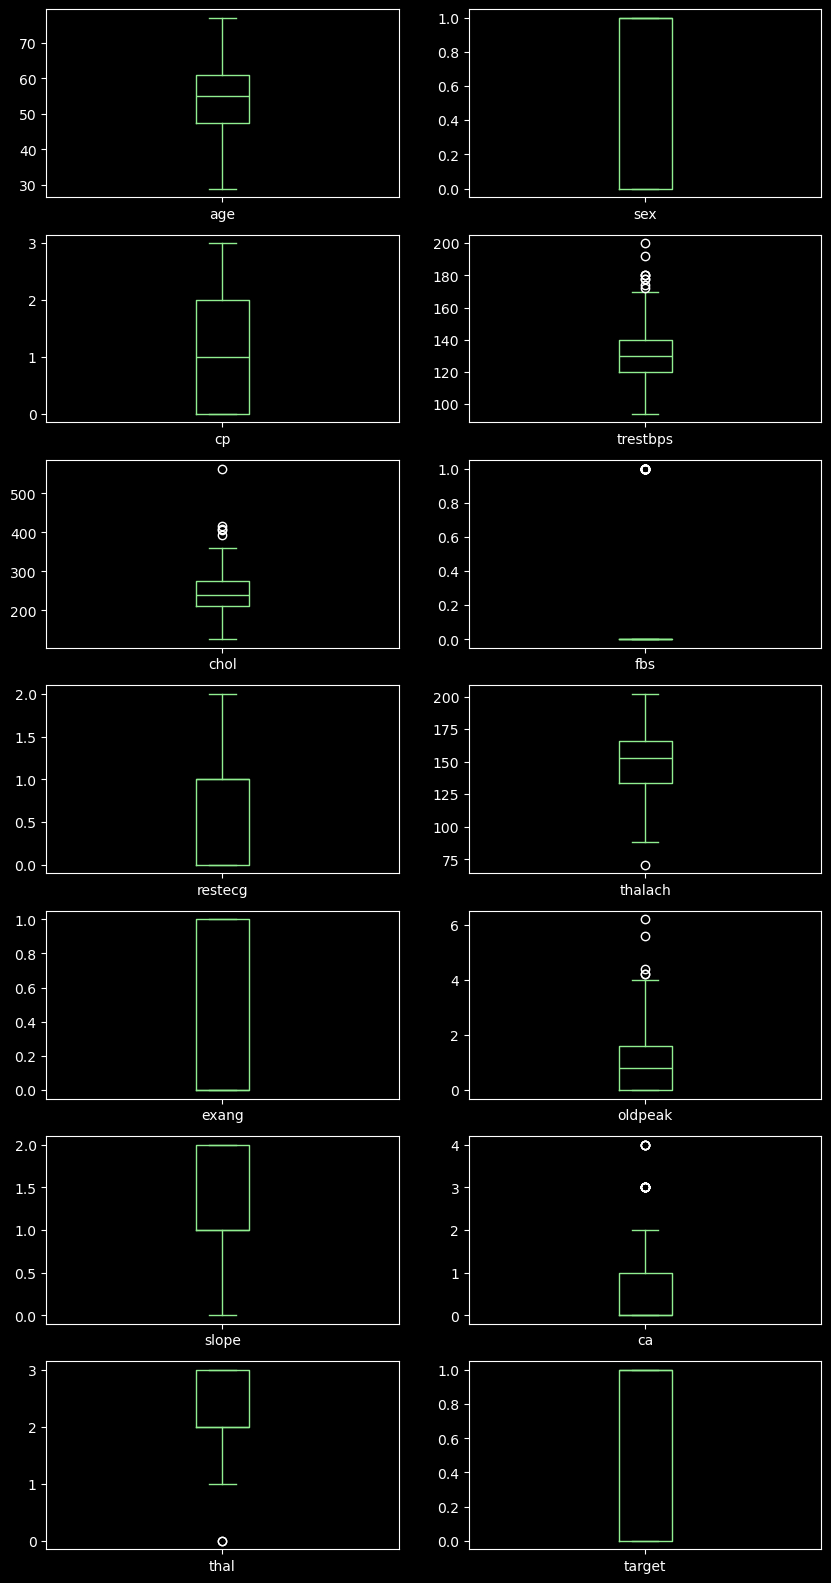

In [7]:
# Let's check for outliers

# Create box plots
heart_disease_df.plot(kind='box', subplots=True,
                      color='lightgreen', layout=(7, 2), figsize=(10, 20))
plt.show()

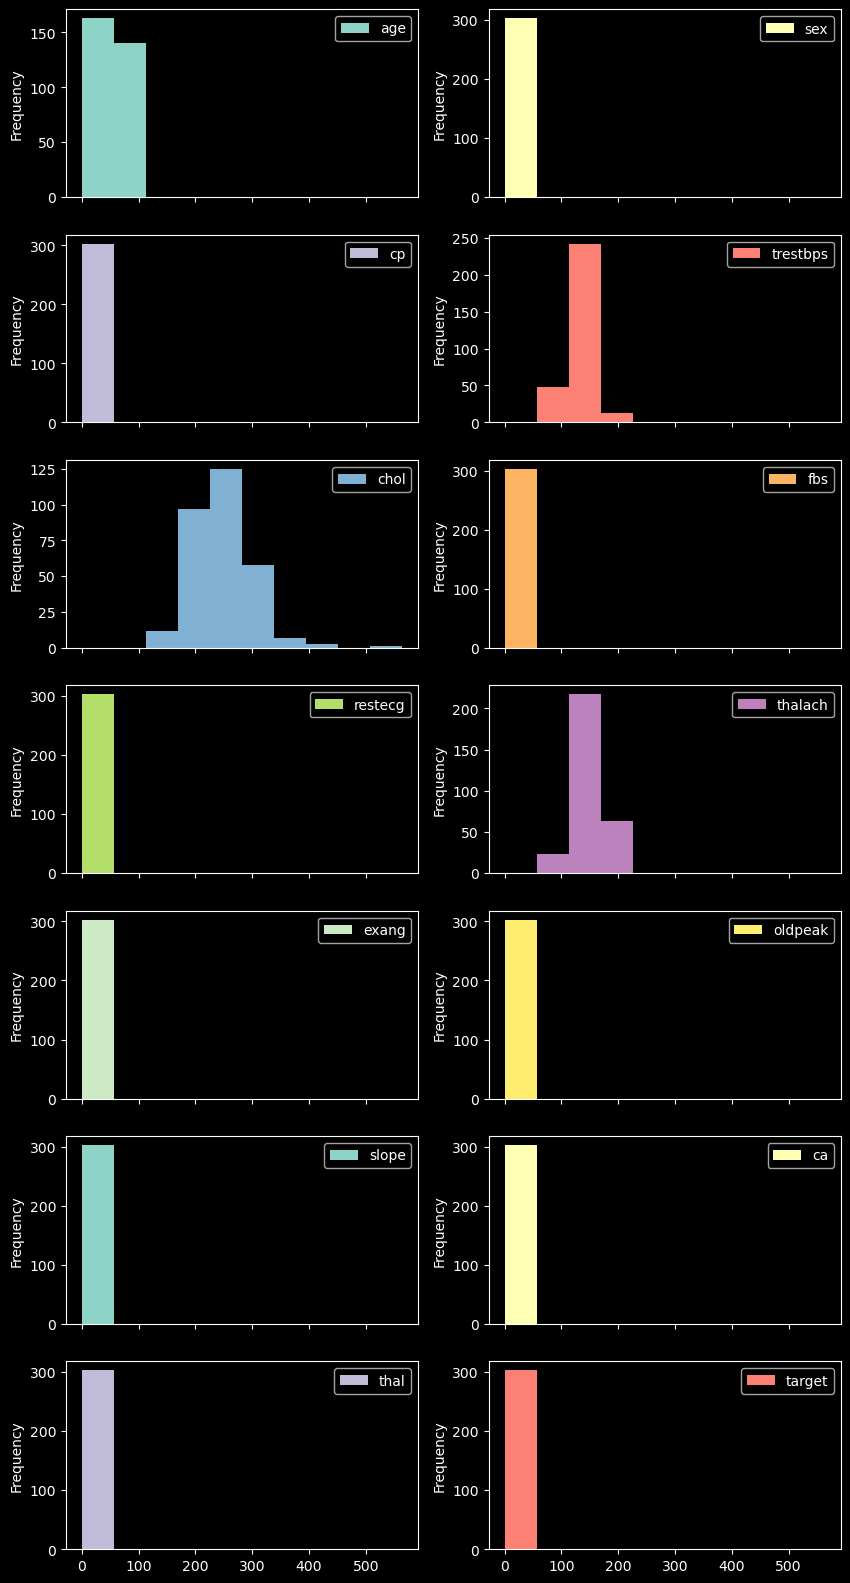

In [8]:
# Now, let's plot Histograms.
heart_disease_df.plot.hist(subplots=True, layout=(7, 2), figsize=(10, 20))
plt.show()

`Note : I think, Danial sometimes really mashes up with the workflow !!`
`Especially, when I'm trying to create notes, Just Importing New big, dirty data to follow Scikit-learn Workflow Again !!`


### **Feature Encoding :**

#### OK, for Data Preprocessing, let's convert all the columns into numerical format first !!

- Converting Categorical Variables to Numerical Ones!


In [9]:
car_sales_df = pd.read_csv("./All CSVs/car-sales-extended.csv")
car_sales_df.head(5)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
# Now let's Check it's columns, datatypes etc.
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


### Here, we found 5 columns, 2 out of which aren't numerical. And as we know here.

#### **In Supervised Learning, we are trying to predict Car prices, it's a continuous value (In currencies). Hence, we should run a regressor model.**

**And also, for a regression model, we must feed it data with numerical values only!! that's why we're doing Feature Encoding.**


In [11]:
# If we Try to train ML Model without Encoding categorical variables.

# Just differentiate predictor variables and target variable. (Into x & y)


# Let's quickly Divide the Data!
from sklearn.ensemble import RandomForestRegressor
x = car_sales_df.drop("Price", axis=1)  # Predictor Variables
y = car_sales_df["Price"]  # Target Variable


Random_Forest_Reg = RandomForestRegressor()

# This will raise "ValueError".
# RandomForestregModel.fit(x, y) # i.e. Could not convert String to Float.

### Let's Encode Our Categorical Features :


In [12]:
# Scikit-learn submodule
from sklearn.preprocessing import OneHotEncoder  # Feature Encoder
# Transformer will fit Encoder within itself
from sklearn.compose import ColumnTransformer

# Let's define categorical features.
# Why Doors? Cause it has only 3 possible values. Let it categorical.
categorical_features = ["Make", "Colour", "Doors"]

# Our One_Hot Encoder object
one_hot = OneHotEncoder()

# Column Transformer : Fit desired Encoder to specific subsets of Columns.
transformer = ColumnTransformer(
    # Must be a list/tuple of Encoder and column subsets.
    transformers=[("One_Hot", one_hot, categorical_features)],
    remainder="passthrough"  # Let remaining columns stay!
)

In [13]:
# Now Let's Encode `Predictor Variables`
transformed_x = transformer.fit_transform(x)

pd.DataFrame(transformed_x)  # Encoded Variables | Everything Numerical

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


### **`One-Hot Encoder (One-Hot Encoding)`**

- One-Hot Encoding is a technique used in machine learning to convert categorical data (data that represents categories or labels) into a numerical format. It works by creating binary columns for each category or label, where each column represents the presence or absence of a specific category. This helps machine learning models work with categorical data, as they require numerical input.

- For example, if you have a "Color" column with categories like "Red," "Blue," and "Green," one-hot encoding would transform it into binary columns, each corresponding to one color. If an item is "Red," the "Red" column gets a 1, and the others get 0. This way, machine learning algorithms can handle categorical data without making assumptions about the relationships between categories.

#### **Here's one more way to do it with Pandas :**


In [14]:
# Transforms Categorical Columns via one_hot Encoding
pd.get_dummies(car_sales_df[categorical_features])

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


#### Let's split the Data into **Training/Testing sets :**


In [15]:
# Splitting the Data For training | Testing purpose.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    transformed_x, y, test_size=.20)

##### **Let's Train our Model With brand new Encoded Variables :**


In [16]:
# Fitting the Data into Model i.e. Training
Random_Forest_Reg.fit(x_train, y_train)

Random_Forest_Reg.score(x_test, y_test)

0.22049263460462942

In [17]:
print(
    f"Total Accuracy : { Random_Forest_Reg.score(x_test, y_test) * 100:.3} %")

Total Accuracy : 22.0 %


**Hence, the Accuracy of the Model is pretty bad, this is because of the Available Feature (predictor) variables. It was really Hard to predict the Price Using only this Data.**


<hr>

### **What if we got Missing values in our DataSet??**

**Handling missing values :**

- What if got missing values in our Data set?? It can problem with outcome!
- We Must deal with missing values to ensure completeness of the data.
- Also in Feature Encoding, missing values can lead to wrong outcomes.

**There're many ways to Handle missing Data relative to the nature of Data we have!!**

1. Fill the Missing values with appropriate ones (Imputation).
2. Remove the rows with missing values.

`Has Our current DataFrame missing values ??`


In [18]:
# Check for missing values.
print("Is there any missing values ??", car_sales_df.isna().values.any())
# No, it has no missing values at all.

Is there any missing values ?? False


#### **_Let's Import Another Data Set that contains missing values to Handle it!!_**
`Note : We used pandas to fill missing values here.`  We'll also do it in skLearn.

In [19]:
# import to DataFrame
car_sales_missing_df = pd.read_csv(
    "./All CSVs/car-sales-extended-missing-data.csv")
car_sales_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [20]:
# Let's check Total missing values
print(f"""
    Does this DF has missing values? , {car_sales_missing_df.isna().values.any()}
    How many missing values are there? , {car_sales_missing_df.isna().values.sum()}                

    Now, we have to deal with these values !!
    It may produce wrong outcomes, incorrect data transforms etc.
""")


    Does this DF has missing values? , True
    How many missing values are there? , 249                

    Now, we have to deal with these values !!
    It may produce wrong outcomes, incorrect data transforms etc.



**Also, features encoding with this DataFrame gives error in older version of Sklearn <br>As one_hot Encoder couldn't deal with NaN values with older versions**
<br> Still, in newer versions, we must deal with missing values to get correct & complete outcome.


In [21]:
# Let's see missing values column wise.
car_sales_missing_df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [22]:
# Filling Missing values can never be accurate!! (Of course it's dummy data at all)

# We can use central tendencies (mean/mode/median) for filling numerical columns.
# For categorical columns | let's just fill "missing" string for now.

# Fill only the Feature columns for now, we'll drop all rows missing Price (it's crucial, we have to predict it)

car_sales_missing_df["Make"].fillna("missing", inplace=True)  # Make column

car_sales_missing_df["Colour"].fillna("missing", inplace=True)  # Colour col

# We'll interpret "Doors" column as categorical | Fill it with most common value for "Doors" a.k.a "MODE"
car_sales_missing_df["Doors"].fillna(
    car_sales_missing_df.Doors.mode()[0], inplace=True)

# Filling Odometer with mean value
car_sales_missing_df["Odometer (KM)"].fillna(car_sales_missing_df["Odometer (KM)"].mean(), inplace=True)

In [23]:
# Let's check Again
car_sales_missing_df.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [24]:
# Keeping rows where "Price" is NaN, is dangerous for accuracy!!
# Hence, dropping the rows with Price as NaN

car_sales_missing_df.dropna(inplace=True)

# Cleaned Data !
print(f"{len(car_sales_missing_df)} rows remaining")
car_sales_missing_df.isna().sum()

950 rows remaining


Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

#### **What is Feature Scaling ??**

Feature scaling refers to putting all of our Features (predicting variables) on the same scale of magnitude.
<br>It comes under Data Preprocessing to make the Data Correct & clean for ML Algorithms.

#### **Why it's necessary ??**

Often, we'll have our Features with different units that can greatly vary in magnitude ranges.
<br>The values (magnitudes) of our Features can vary so much, that it makes ML Algorithms hard to find patterns and train efficiently.

It makes ML Algorithms to inaccurately calculate distances b/w two data points
<br>i.e. it may weigh **feature with high magnitude** more than the feature with **low magnitude** units.

To suppress this issue, we need to have our **Features on the same scale** i.e. on the same level of magnitude.

That is why we have to **Scale our Features**.

`Note : There are algorithms which are affected greatly by this varying ranges of Features, but also algorithms which have no effect due to this issue.`<br>

`Not all ML algorithms required feature scaling !!`



**Feature Scaling is given [Here](./Images/Feature_Scaling.png)**

I read from these 3 articles mainly provided by the Instructor!!
Given here : [1](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/), [2](https://rahul-saini.medium.com/feature-scaling-why-it-is-required-8a93df1af310), [3](https://benalexkeen.com/feature-scaling-with-scikit-learn/)

`We'll do it when needed.`

---

#### **Let's try to fill missing values with SciKit-Learn :**

we've learned how to fill missing values with Pandas, we just filled based on overall data, **instead it is suggested to fill data separately for training and testing sets.**

`To prevent data leakage.` It should be :

* Split your data first (into train/test), always keep your training & test data separate.

* Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

* Don't use data from the future (test set) to fill data from the past (training set)

This approach is a correction in newer update of the course.<br>
`The Entire update is given in the provided` [google colab Notebook](https://colab.research.google.com/drive/162DyoCBFeufMjJI7n4XCiYpdqIdktZw_).

##### **Let's fill missing data using scikit-learn following the above approach.**

Scikit-Learn provides a class called [`sklearn.impute.SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) which allows us to do a similar thing.

`SimpleImputer()` transforms data by filling missing values with a given `strategy` parameter.

And we can use it to fill the missing values in our DataFrame as above.

At the moment, our dataframe has no mising values.

In [25]:
car_sales_missing_df.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

Let's reimport this to have missing values. So, we can fill it with Scikit-learn.

In [26]:
car_sales_missing_df = pd.read_csv("./All CSVs/car-sales-extended-missing-data.csv")
car_sales_missing_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [27]:
# Let's check for missing values.
car_sales_missing_df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

##### Let's fill missing values but at first, we'll split the dataset into separate Training and Testing sets, then fill the values.

* **We're doing this to Prevent data leaks.**
* **We shouldn't have data from test sets in our training set. To score model genuinely.**
  
  Let's split :
To begin, we'll remove the rows which are missing a `Price` value. (this shouldn't be imputed to improve efficiency.)

In [28]:
# Drop rows missing a Price value.
car_sales_missing_df.dropna(subset = "Price", inplace= True, ignore_index=True) # Drop 50 rows.
car_sales_missing_df.isna().sum() # Dropped

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [29]:
# Let's split the data into inputs(Feature variables) and labels (target).
x = car_sales_missing_df.drop('Price', axis=1) # Features
y = car_sales_missing_df['Price'] # Target


# Splitting into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20) 

##### Fill missing values with scikit-learn.

In [30]:
# Fill missing values with scikit-learn | SimpleImputer
# Importing SimpleImputer for imputing missing values
from sklearn.impute import SimpleImputer
# Importing ColumnTransformer to transform specific columns with imputer.
from sklearn.compose import ColumnTransformer

# For categorical columns ('Make', 'Colour'), missing values will be filled with the string 'missing'.
category_imputer = SimpleImputer(strategy='constant', fill_value='missing')

# For the numeric column 'Doors', missing values will be filled with the most frequent value (Mode).
door_imputer = SimpleImputer(strategy='most_frequent')

# Fill numerical missing data with "mean" of that "column".
num_imputer = SimpleImputer(strategy='mean')

# Define columns to apply these imputers on.

category_columns = ["Make", "Colour"]  # Categorical columns
# Doors, though numeric, treated as categorical for mode imputation
door_column = ["Doors"]
num_columns = ["Odometer (KM)"]  # Numeric column

# Create an imputer to fill missing values (Something that fills missing data)
imputer = ColumnTransformer( # To transform different columns using multiple imputers.
    [
        # Apply category imputer to categorical columns
        ("cat_imputer", category_imputer, category_columns),
        # Apply door imputer to the 'Doors' column
        ("door_imputer", door_imputer, door_column),
        # Apply numeric imputer to the 'Odometer (KM)' column
        ("num_imputer", num_imputer, num_columns)
    ]
)

# Fit transform using x_train data on x_train.
x_train_filled = imputer.fit_transform(x_train)

# Here "x_test" is avoided to be used in fit_transform.
# To avoid "Data Leakage" from test set to training set (Improves Evaluation).

# Then, learned transform (learned via x_train) should be used on x_test to impute (fill) missing values.
x_test_filled = imputer.transform(x_test)


In [31]:
# Converting x_train_filled & x_test_filled (ndarray) to Pandas DataFrames
# We Needed Data Frames to apply Feature encoding using specific column names.

x_train_filled = pd.DataFrame(x_train_filled, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
x_test_filled = pd.DataFrame(x_test_filled, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

(type(x_train_filled), type(x_test_filled))

# Let's see, missing data is gone!!
x_train_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [32]:
# See filled test data if any missing value remaining?
x_test_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

#### **Now, let's Encode our categorical Features to make them numerical :**

In [33]:
# Importing "OneHotEncoder" & "ColumnTransformer" to transform categorical Features.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Categorical features to be Encoded.
categorical_features = ["Make", "Colour", "Doors"] # Treating doors as categorical.

one_hot = OneHotEncoder() # Encoder

# Transformer to transform data using OneHotEncoder
transformer = ColumnTransformer(
    [("one_hot", one_hot, categorical_features)],
    remainder="passthrough"
)

# Transform "x_train_filled" categorical columns to numericals (Feature Encoding)
transformed_x_train_filled = transformer.fit_transform(x_train_filled)
transformed_x_test_filled = transformer.transform(x_test_filled)

Data is Filled (No-missing) & Encoded (categorical features into numerical features).

Now, let's train a regression model.

In [34]:
# Importing RandomTreeRegressor Model
from sklearn.ensemble import RandomForestRegressor

regressor_model = RandomForestRegressor(100) ## Initialize model

## Training Model
regressor_model.fit(transformed_x_train_filled, y_train) 

print(
    f"Model Accuracy : {regressor_model.score(transformed_x_test_filled, y_test) * 100: .2f} %")

Model Accuracy :  9.57 %


# **2. Choosing the right estimator/Algorithm/Model for your problem.**

Some things to note :

* Sklearn refer to ML Models, algorithms as **Estimators**.
* **Classification Problem** - predicting a category (Email is **Spam or not**).
    * Often, you'll see `clf` (short for classifier) used as a Classification Estimator.
* **Regression Problem** - predicting a continuous value (a number) i.e. Predicting **price of a car**.

If you're confused in selecting model on a problem while using **SKlearn**.<br>
Refer to the following [Sklearn ML Map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

### 2.1 Picking a machine learning model for a regression problem

SKlearn provides a wide range of DataSets to practice on.
You can get them by `sklearn.datasets.yourdataset`.

Read [sklearn.datasets](https://scikit-learn.org/stable/datasets.html#datasets). What are **loaders** & **fetchers** etc.

Let's use the California Housing dataset (a real world dataset) - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [35]:
# Let's fetch the data according to the documentation.
# We'll get a Bunch (dictionary like) object.
from sklearn.datasets import fetch_california_housing # This func. will download & load it to the variable.

housing_dictionary = fetch_california_housing(as_frame=True) # Get data-value as a DataFrame

housing_dictionary # Let's view it.

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [36]:
# We got a lot of information.
# Let's convert the Features & Target into Single "Pandas DataFrame" first.

# Contains the DataFrame with "frame" key
housing_df = housing_dictionary["frame"]

housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [37]:
# Here's the Description of the DataSet we're using.
print(housing_dictionary["DESCR"])

# The target variable is the median house value for California districts,
# expressed in hundreds of thousands of dollars ($100,000).

# Target Column -> MedHouseVal

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [38]:
# Let's Change the Target name.
# "MedHouseVal" to "target" to better understand our objective.
housing_df.rename(
    {"MedHouseVal" : "target"},
    axis=1,
    inplace=True
)

housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [39]:
# see columns information & missing values.
print(housing_df.info(), end="\n\n") # It says every column is "Not null"
print(housing_df.isna().sum()) # Our data is clean as f**k.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


##### **OK so our data is Perfect.**
##### **It's Clean, Formatted & ready to use.**

**Let's Train a Model Based on the "Choosing Estimator Map" below:**

![](https://scikit-learn.org/stable/_static/ml_map.png)

In [40]:
# We're not sure, whether "few features should be important" or not!
# Hence, we're trying "Ridge regression" model.
from sklearn.linear_model import Ridge

np.random.seed(7) # random seed to replicate same training & testing data.

# First, let's split into "Features" (x) & "Target" (y).
x = housing_df.drop(columns="target") # Drop target remaining features.
y = housing_df["target"] # Target column

# Split data into "training & testing sets". | 25% as testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Let's create and fit/train model with Ridge regression.
# Hyperparameter "alpha" must not be zero, else it'll be similar to a LinearRegression model.
model = Ridge(alpha=1)
model.fit(x_train, y_train)

# Let's evaluate our model on test set.
model.score(x_test, y_test)

0.6070119883512886

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [41]:
# Let's import RandomForestRegressor model from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model.
model = RandomForestRegressor(n_estimators=90)
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)

0.7965674619472307

##### Pretty Good!!

Ensemble learning is the combination of several base models to in order to improve generalizability / robustness of a single model.

**Random Forests** are famous algorithms in it.

Random forests are combinations of lots of different decision trees.

A decision tree is an excellent algorithm of **Supervised Learning**.<br>
Which is like an **If-else tree** that can solve both regression & classification problems.



### **2.2 Picking a Machine Learning model/Estimator for a classification problem.**

* Let's see the Map : https://scikit-learn.org/stable/_static/ml_map.png

* We're using built-in **"breast cancer"** data. See it [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

In [42]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer(as_frame=True)

breast_cancer_data

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [43]:
# Let's storerbreast_cancer_data.datathe data into a DataFrame.
breast_cancer_df = breast_cancer_data["frame"] ## Get DataFrame.
breast_cancer_df.head() # We have a lot of Features!! (30 of them)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [44]:
# Let's split the data into "Features" & "Target"
x = breast_cancer_df.drop(columns="target") # Predicting variables.
y = breast_cancer_df.target # Get target

In [45]:
# Let's get info about each column 
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**It's kind of hard to Analyze this data and Visualize it.**<br>
**Just with some EDA, Let's train our model.**

In [56]:
# Let's view some Statistical measures.
breast_cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


**Now as we know, we have three types of each feature :**
1. Actual mean value.
2. Error of the Feature.
3. Worst Value of the Feature.

Let's assume the later two, of very `less significance for now` !!<br>
We'll drop features having **"error & worse"** values.

**Also Our Features need to be scaled !!** 
Feature scaling is already defined [here](./Images/Feature_Scaling.png).

Let us use `StandardScaler` class to scale our remaining feature to the **same level of Magnitude.**
  

In [58]:
# Dropping unnecessary features.
x_dropped = x.drop(columns=[col for col in x.columns if ("error" in col or "worst" in col)])
x_dropped # Remaining columns


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [66]:
## Let's scale our features via "standard Scaler class" (Standardization)
from sklearn.preprocessing import StandardScaler
x_standardized = StandardScaler().fit_transform(x_dropped) # Using object directly to fit & transform.
x_standardized = pd.DataFrame(x_standardized, columns=x_dropped.columns) # Features after standardization.
x_standardized

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


**Splitting the data into `Training & Testing` Sets**.<br>
**And Using an Estimator using the `sklearn` ML Map.**

In [75]:
## Let's split the data into "Train and Test"
## Then fit it to the model.
np.random.seed(7) # For replication
x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.25)

# Using "LinearSVC" based on the Sklearn ML map.
from sklearn.svm import LinearSVC
model = LinearSVC(dual=True) # model with default parameters # Dual=True to suppress FutureWarning.

# Fit the model on training set
model.fit(x_train, y_train)

# Get the score on testing set
score = model.score(x_test, y_test)

print(f"Accuracy of the Linear SVC model on Breast_Cancer_DataFrame : {score : .2%} \n\
    Oh my god!!, That's a pretty good Accuracy score!!")

Accuracy of the Linear SVC model on Breast_Cancer_DataFrame :  95.10% 
    Oh my god!!, That's a pretty good Accuracy score!!


**Let's still try a different model!!, "An Ensemble model."**<br>
It's usually performs better due to combinations of multiple base models.

In [103]:
# Using same training & testing data sets to "ensemble.RandomForestClassifier" model.
from sklearn.ensemble import RandomForestClassifier
np.random.seed()
model = RandomForestClassifier() # Random forest classifier
model.fit(x_train, y_train) # Fit/Train model.

score = model.score(x_test, y_test) # Score model

print(f"Accuracy of Random Forest Classifier : {score : .2%}")
print("It's somewhat improved!!")

Accuracy of Random Forest Classifier :  96.50%
It's somewhat improved!!
